In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize

In [128]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

In [129]:
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [130]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [131]:
edu_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [132]:
edu_df.isna().any()

PRIMARY_KEY                     False
STATE                           False
YEAR                            False
ENROLL                           True
TOTAL_REVENUE                    True
FEDERAL_REVENUE                  True
STATE_REVENUE                    True
LOCAL_REVENUE                    True
TOTAL_EXPENDITURE                True
INSTRUCTION_EXPENDITURE          True
SUPPORT_SERVICES_EXPENDITURE     True
OTHER_EXPENDITURE                True
CAPITAL_OUTLAY_EXPENDITURE       True
GRADES_PK_G                      True
GRADES_KG_G                      True
GRADES_4_G                       True
GRADES_8_G                       True
GRADES_12_G                      True
GRADES_1_8_G                     True
GRADES_9_12_G                    True
GRADES_ALL_G                     True
AVG_MATH_4_SCORE                 True
AVG_MATH_8_SCORE                 True
AVG_READING_4_SCORE              True
AVG_READING_8_SCORE              True
dtype: bool

In [133]:
columns=['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [134]:

for c in columns:
    education_df=edu_df.fillna(edu_df[c].mean())
    

## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [163]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,7.545230e+05,7.800215e+06,6.575151e+05,3.617456e+06,3.525319e+06,7.889951e+06,4.086228e+06,2.299517e+06,3.535937e+05,...,58895.455502,58651.104965,49527.175341,4.736494e+05,2.254012e+05,7.094276e+05,253.281399,268.921792,247.658636,263.661132
std,7.393983,1.027849e+06,1.133217e+07,1.093931e+06,5.340916e+06,5.277107e+06,1.154954e+07,6.061190e+06,3.243801e+06,5.115187e+05,...,78814.324881,77512.145518,66616.520059,6.320258e+05,3.020694e+05,9.481246e+05,15.158469,9.313052,21.968158,3.928132
min,1992.000000,2.636611e+02,2.636611e+02,2.636611e+02,0.000000e+00,2.636611e+02,2.636611e+02,2.636611e+02,2.636611e+02,2.636611e+02,...,263.661132,263.661132,263.661132,2.636611e+02,2.636611e+02,2.636611e+02,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,1.146450e+05,1.329998e+06,1.110600e+05,7.009645e+05,4.831358e+05,1.339460e+06,7.008068e+05,3.979800e+05,4.671700e+04,...,9670.750000,9689.750000,8628.750000,7.845150e+04,3.822050e+04,1.179615e+05,241.027377,263.661132,223.402681,263.661132
50%,2004.000000,4.889355e+05,4.005586e+06,3.286840e+05,2.122772e+06,1.525442e+06,4.025104e+06,2.095198e+06,1.161078e+06,1.915495e+05,...,36995.000000,37652.500000,32926.000000,3.038665e+05,1.438930e+05,4.488920e+05,263.661132,263.661132,263.661132,263.661132
75%,2011.000000,9.211780e+05,9.276958e+06,7.505032e+05,4.269811e+06,3.959033e+06,9.434922e+06,4.938820e+06,2.795888e+06,4.568915e+05,...,71814.250000,72131.000000,64616.250000,5.749118e+05,2.825390e+05,8.724220e+05,263.661132,274.677587,263.661132,263.661132
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,263.661132,300.568235,263.661132,280.499130


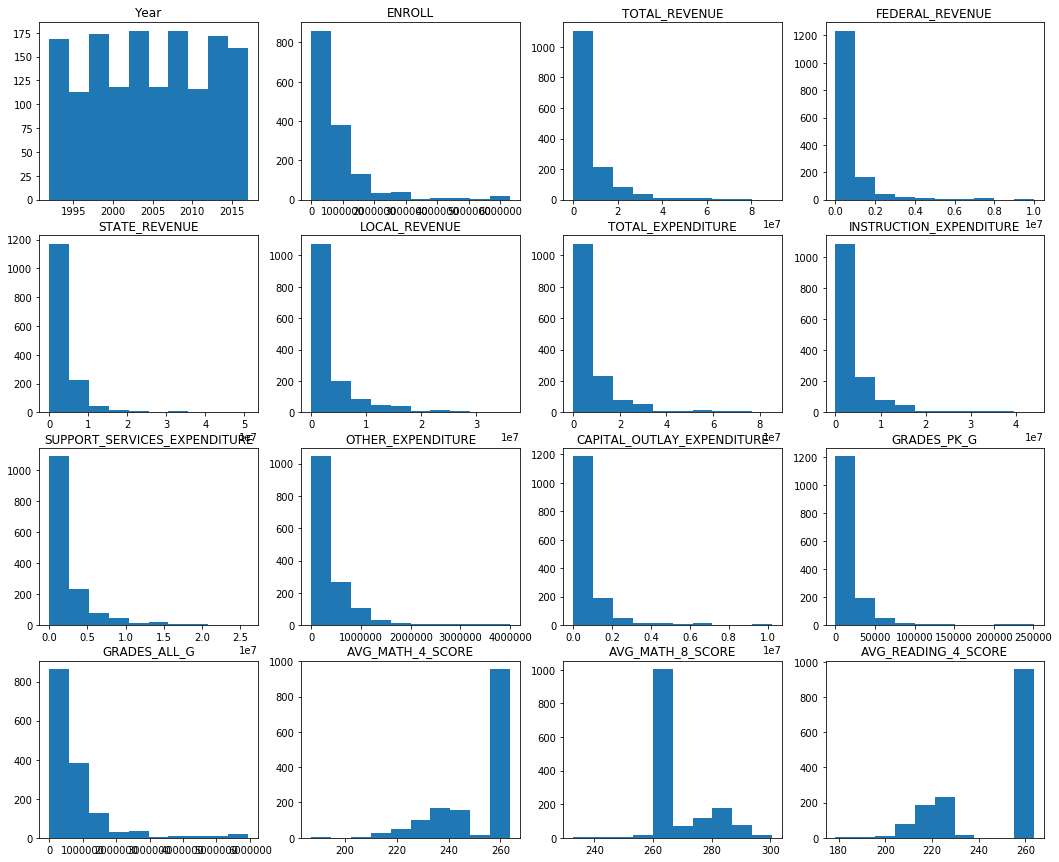

In [136]:
plt.figure(figsize=(18,15))

plt.subplot(4,4,1)
plt.hist(education_df.YEAR)
plt.title('Year')

plt.subplot(4,4,2)
plt.hist(education_df.ENROLL)
plt.title('ENROLL')

plt.subplot(4,4,3)
plt.hist(education_df.TOTAL_REVENUE)
plt.title('TOTAL_REVENUE')

plt.subplot(4,4,4)
plt.hist(education_df.FEDERAL_REVENUE)
plt.title('FEDERAL_REVENUE')

plt.subplot(4,4,5)
plt.hist(education_df.STATE_REVENUE)
plt.title('STATE_REVENUE')

plt.subplot(4,4,6)
plt.hist(education_df.LOCAL_REVENUE)
plt.title('LOCAL_REVENUE')

plt.subplot(4,4,7)
plt.hist(education_df.TOTAL_EXPENDITURE)
plt.title('TOTAL_EXPENDITURE')

plt.subplot(4,4,8)
plt.hist(education_df.INSTRUCTION_EXPENDITURE)
plt.title('INSTRUCTION_EXPENDITURE')

plt.subplot(4,4,9)
plt.hist(education_df.SUPPORT_SERVICES_EXPENDITURE)
plt.title('SUPPORT_SERVICES_EXPENDITURE')

plt.subplot(4,4,10)
plt.hist(education_df.OTHER_EXPENDITURE)
plt.title('OTHER_EXPENDITURE')

plt.subplot(4,4,11)
plt.hist(education_df.CAPITAL_OUTLAY_EXPENDITURE)
plt.title('CAPITAL_OUTLAY_EXPENDITURE')

plt.subplot(4,4,12)
plt.hist(education_df.GRADES_PK_G)
plt.title('GRADES_PK_G')

plt.subplot(4,4,13)
plt.hist(education_df.GRADES_ALL_G)
plt.title('GRADES_ALL_G')

plt.subplot(4,4,14)
plt.hist(education_df.AVG_MATH_4_SCORE)
plt.title('AVG_MATH_4_SCORE')

plt.subplot(4,4,15)
plt.hist(education_df.AVG_MATH_8_SCORE)
plt.title('AVG_MATH_8_SCORE')

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_4_SCORE)
plt.title('AVG_READING_4_SCORE')

plt.show()

## 2. Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [137]:
ed_CA=education_df[education_df['STATE']=='CALIFORNIA']

In [138]:
ed_CA

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,2.636611e+02,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,...,418418.000000,363296.000000,270675.000000,3.286034e+06,1.372011e+06,4.717112e+06,208.398961,260.892247,196.764414,263.661132
56,1993_CALIFORNIA,CALIFORNIA,1993,5.129788e+06,2.804334e+07,2.151157e+06,1.706415e+07,8.828035e+06,2.811099e+07,1.528115e+07,...,420233.000000,380223.000000,277271.000000,3.328627e+06,1.393530e+06,4.782111e+06,263.661132,263.661132,263.661132,263.661132
108,1994_CALIFORNIA,CALIFORNIA,1994,4.120498e+06,2.344084e+07,2.095878e+06,1.317555e+07,8.169417e+06,2.301269e+07,1.244386e+07,...,426919.000000,388561.000000,285132.000000,3.372294e+06,1.421547e+06,4.860291e+06,263.661132,263.661132,263.661132,263.661132
161,1995_CALIFORNIA,CALIFORNIA,1995,5.299405e+06,2.951221e+07,2.612241e+06,1.554149e+07,1.135849e+07,3.009755e+07,1.614642e+07,...,428553.000000,399039.000000,287428.000000,3.430751e+06,1.464841e+06,4.964774e+06,263.661132,263.661132,263.661132,263.661132
213,1996_CALIFORNIA,CALIFORNIA,1996,5.460484e+06,3.128298e+07,2.603882e+06,1.706147e+07,1.161762e+07,3.156169e+07,1.688073e+07,...,435217.000000,406456.000000,298669.000000,3.516572e+06,1.525618e+06,5.115423e+06,209.129083,262.772478,201.912591,269.197451
264,1997_CALIFORNIA,CALIFORNIA,1997,5.595836e+06,3.561493e+07,2.850766e+06,2.056073e+07,1.220344e+07,3.386228e+07,1.816044e+07,...,451069.000000,412604.000000,317595.000000,3.591033e+06,1.578929e+06,5.246546e+06,263.661132,263.661132,263.661132,263.661132
316,1998_CALIFORNIA,CALIFORNIA,1998,5.727224e+06,3.918302e+07,3.149260e+06,2.284050e+07,1.319326e+07,3.808767e+07,2.008391e+07,...,462241.000000,424768.000000,334852.000000,3.666271e+06,1.627284e+06,5.375481e+06,263.661132,263.661132,263.661132,263.661132
367,1999_CALIFORNIA,CALIFORNIA,1999,5.839207e+06,4.139344e+07,3.599923e+06,2.369510e+07,1.409842e+07,4.083464e+07,2.111054e+07,...,489356.000000,431730.000000,347914.000000,3.734997e+06,1.675778e+06,5.496767e+06,263.661132,263.661132,263.661132,263.661132
420,2000_CALIFORNIA,CALIFORNIA,2000,5.941946e+06,4.662821e+07,4.024940e+06,2.687792e+07,1.572535e+07,4.582975e+07,2.351439e+07,...,489043.000000,441877.000000,357789.000000,3.804640e+06,1.707952e+06,5.602511e+06,213.565125,262.171027,205.916588,264.494066
472,2001_CALIFORNIA,CALIFORNIA,2001,6.045030e+06,5.328894e+07,4.280358e+06,3.137489e+07,1.763370e+07,5.208254e+07,2.664181e+07,...,485301.000000,461133.000000,365907.000000,3.871843e+06,1.745295e+06,5.717489e+06,263.661132,263.661132,263.661132,263.661132


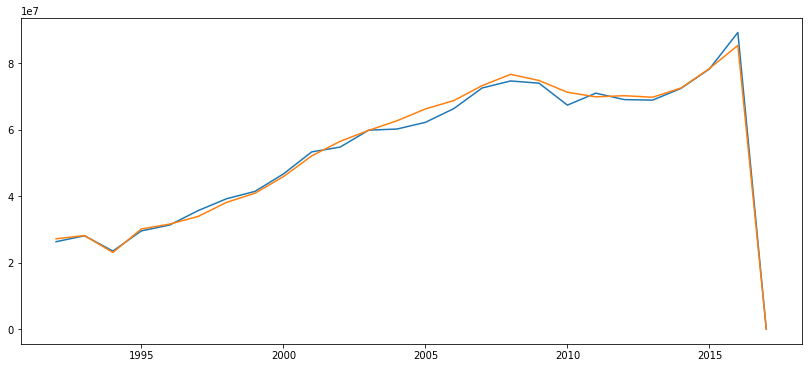

In [165]:
plt.figure(figsize=(14,6))

plt.plot(ed_CA['YEAR'],ed_CA['TOTAL_REVENUE'],label='TOTAL_REVENUE')

plt.plot(ed_CA['YEAR'],ed_CA['TOTAL_EXPENDITURE'],label='TOTAL_EXPENDITURE')
plt.show()

## 3. In your chosen state, in which of the lessons are the students more successful—math or reading?

In [141]:
ed_CA.groupby('STATE')['AVG_MATH_8_SCORE'].mean() # More successful in Math

STATE
CALIFORNIA    266.070179
Name: AVG_MATH_8_SCORE, dtype: float64

In [142]:
ed_CA.groupby('STATE')['AVG_READING_8_SCORE'].mean()

STATE
CALIFORNIA    262.984793
Name: AVG_READING_8_SCORE, dtype: float64

## 4. What are the distributions of the math and reading scores in the sample?

In [143]:
education_df[education_df['STATE']=='CALIFORNIA'].groupby('STATE')['AVG_MATH_8_SCORE'].mean()

STATE
CALIFORNIA    266.070179
Name: AVG_MATH_8_SCORE, dtype: float64

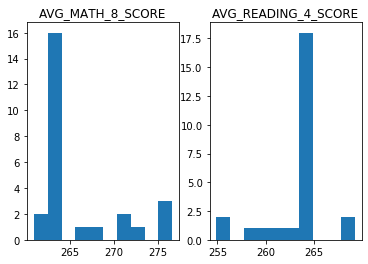

In [144]:
plt.subplot(1,2,1)
plt.hist(education_df[education_df['STATE']=='CALIFORNIA'].AVG_MATH_8_SCORE)
plt.title('AVG_MATH_8_SCORE')

plt.subplot(1,2,2)
plt.hist(education_df[education_df['STATE']=='CALIFORNIA'].AVG_READING_8_SCORE)
plt.title('AVG_READING_4_SCORE')

plt.show()

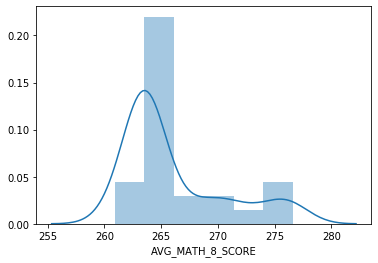

In [145]:
sns.distplot(education_df[education_df['STATE']=='CALIFORNIA'].AVG_MATH_8_SCORE ,kde=True)

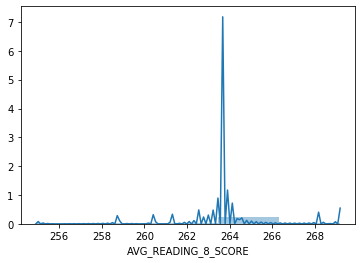

In [146]:
sns.distplot(education_df[education_df['STATE']=='CALIFORNIA'].AVG_READING_8_SCORE )

## 5.Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.

In [148]:
for c in columns:
    edu_median=edu_df.fillna(edu_df[c].median())

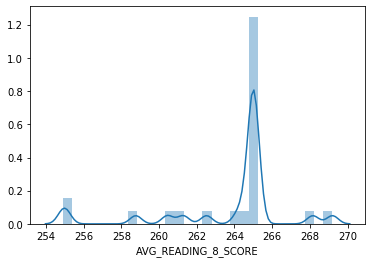

In [149]:
sns.distplot(edu_median[edu_median['STATE']=='CALIFORNIA'].AVG_READING_8_SCORE )

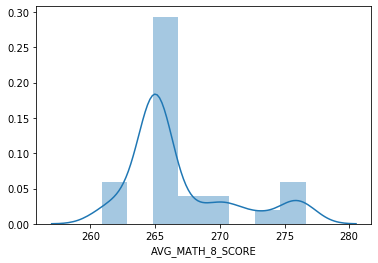

In [150]:
sns.distplot(edu_median[edu_median['STATE']=='CALIFORNIA'].AVG_MATH_8_SCORE )

In [152]:
edu_interpolation=edu_df.copy()
for c in columns:
    edu_interpolation.loc[:,c]=edu_df.loc[:,c].interpolate()

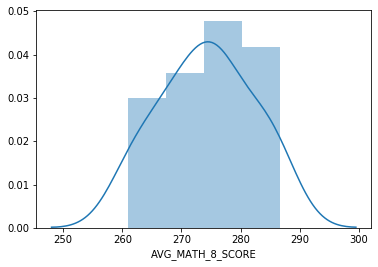

In [153]:
sns.distplot(edu_interpolation[edu_interpolation['STATE']=='CALIFORNIA'].AVG_MATH_8_SCORE )

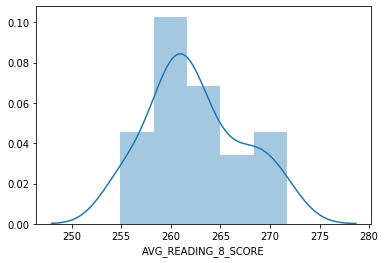

In [154]:
sns.distplot(edu_interpolation[edu_interpolation['STATE']=='CALIFORNIA'].AVG_READING_8_SCORE)

In [156]:
edu_df.isna().any()

PRIMARY_KEY                     False
STATE                           False
YEAR                            False
ENROLL                           True
TOTAL_REVENUE                    True
FEDERAL_REVENUE                  True
STATE_REVENUE                    True
LOCAL_REVENUE                    True
TOTAL_EXPENDITURE                True
INSTRUCTION_EXPENDITURE          True
SUPPORT_SERVICES_EXPENDITURE     True
OTHER_EXPENDITURE                True
CAPITAL_OUTLAY_EXPENDITURE       True
GRADES_PK_G                      True
GRADES_KG_G                      True
GRADES_4_G                       True
GRADES_8_G                       True
GRADES_12_G                      True
GRADES_1_8_G                     True
GRADES_9_12_G                    True
GRADES_ALL_G                     True
AVG_MATH_4_SCORE                 True
AVG_MATH_8_SCORE                 True
AVG_READING_4_SCORE              True
AVG_READING_8_SCORE              True
dtype: bool

In [157]:
edu_drop=edu_df.dropna()

In [159]:
edu_drop.isna().any()

PRIMARY_KEY                     False
STATE                           False
YEAR                            False
ENROLL                          False
TOTAL_REVENUE                   False
FEDERAL_REVENUE                 False
STATE_REVENUE                   False
LOCAL_REVENUE                   False
TOTAL_EXPENDITURE               False
INSTRUCTION_EXPENDITURE         False
SUPPORT_SERVICES_EXPENDITURE    False
OTHER_EXPENDITURE               False
CAPITAL_OUTLAY_EXPENDITURE      False
GRADES_PK_G                     False
GRADES_KG_G                     False
GRADES_4_G                      False
GRADES_8_G                      False
GRADES_12_G                     False
GRADES_1_8_G                    False
GRADES_9_12_G                   False
GRADES_ALL_G                    False
AVG_MATH_4_SCORE                False
AVG_MATH_8_SCORE                False
AVG_READING_4_SCORE             False
AVG_READING_8_SCORE             False
dtype: bool

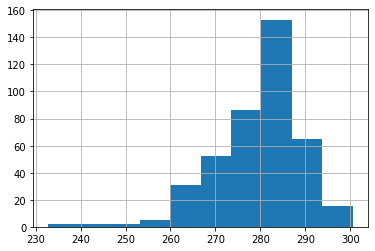

In [162]:
edu_drop.AVG_MATH_8_SCORE.hist()
plt.show()